Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [5]:
data = pd.read_csv("Company_Data.csv")

In [6]:
data.shape

(400, 11)

In [7]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [11]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [12]:
data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [13]:
data.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [15]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [16]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


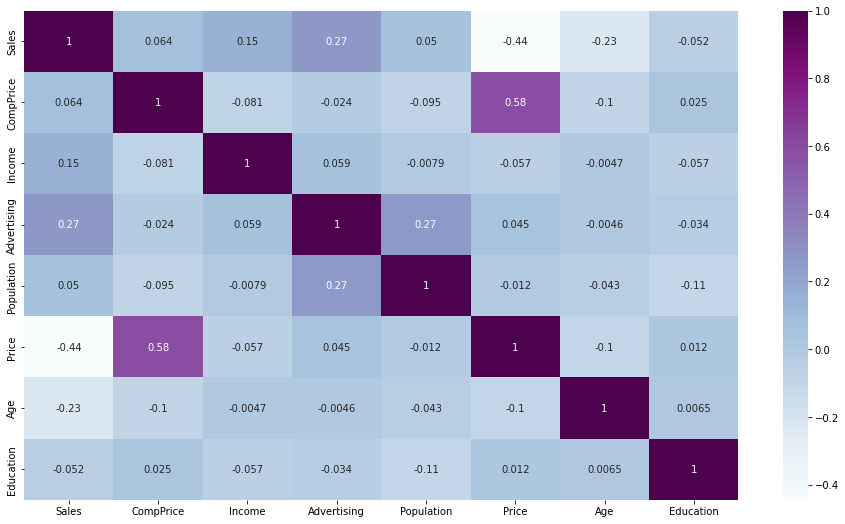

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")
plt.show()

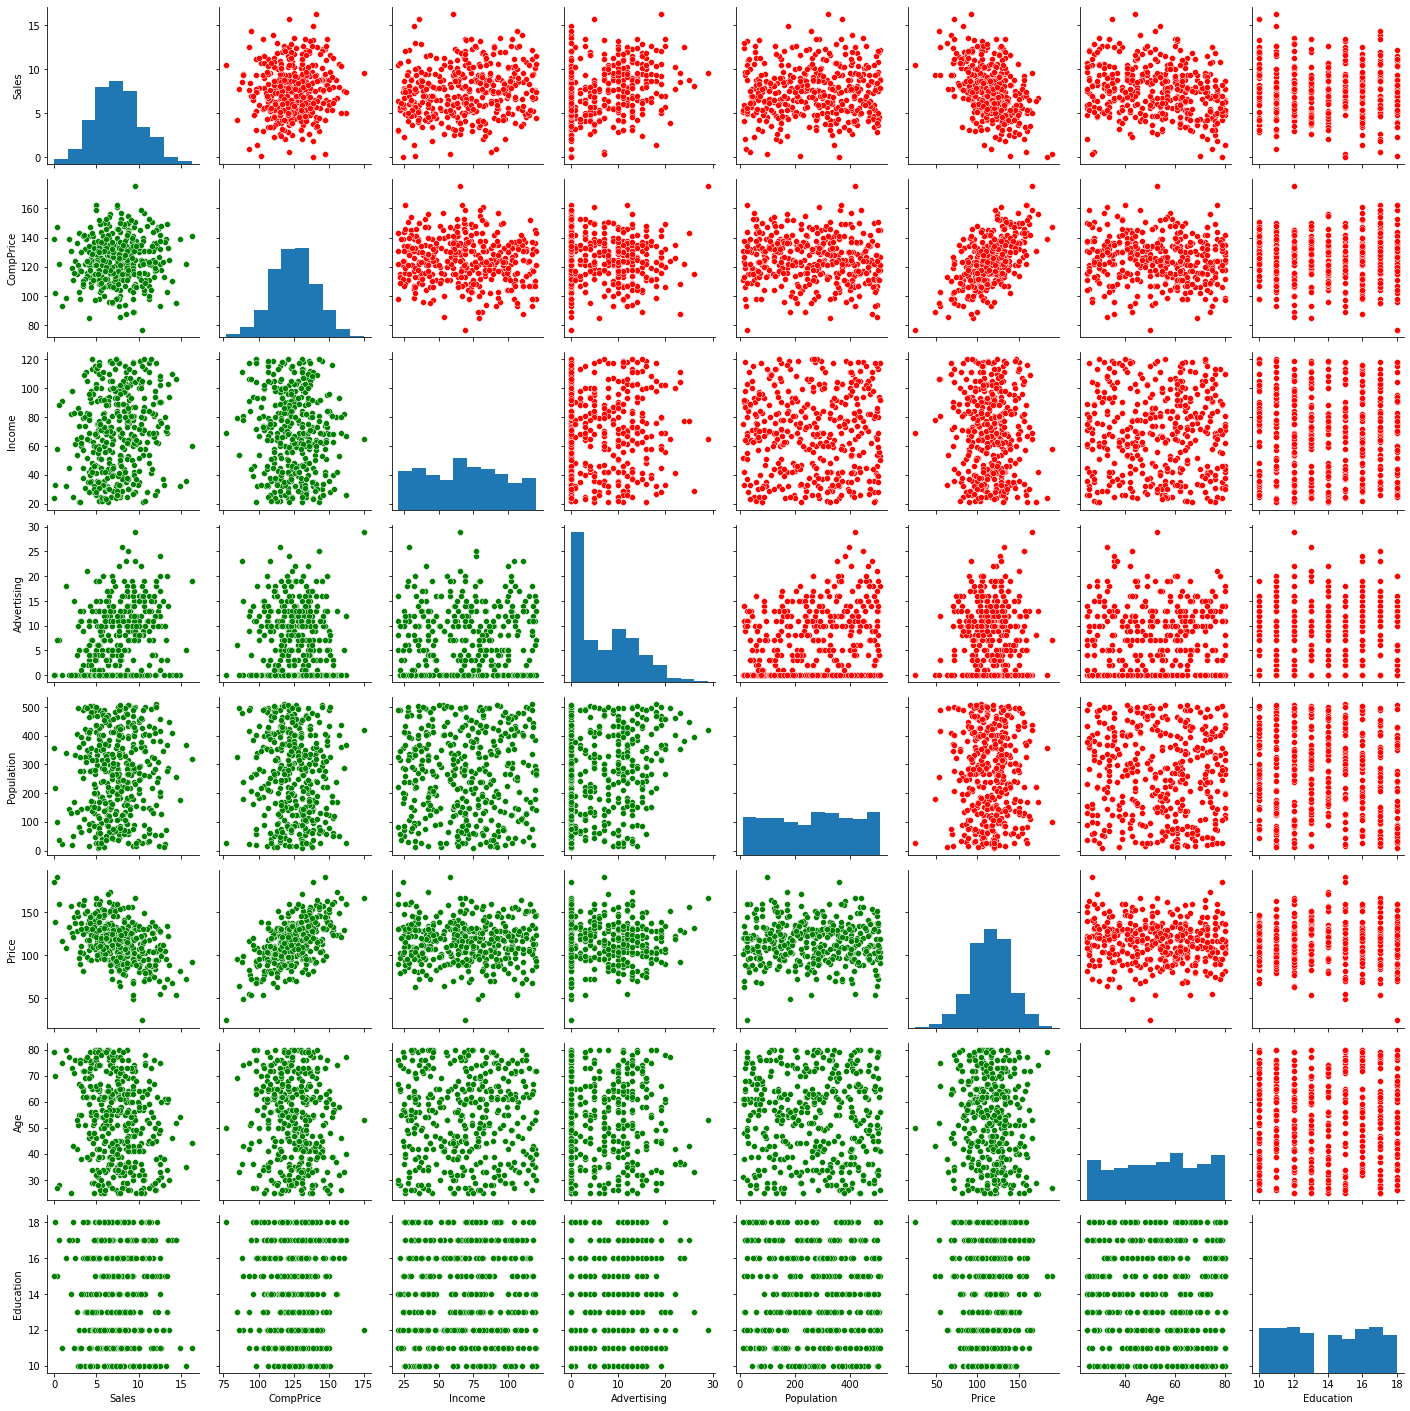

In [18]:
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)
plt.show()

In [19]:
data.head(7)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No


In [20]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(data,columns=['Urban','US'])

In [21]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,0,1,0,1
396,6.14,139,23,3,37,120,Medium,55,11,1,0,0,1
397,7.41,162,26,12,368,159,Medium,40,18,0,1,0,1
398,5.94,100,79,7,284,95,Bad,50,12,0,1,0,1


In [22]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [23]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,3,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,3,38,13,0,1,1,0


In [24]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [25]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [26]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [27]:
df['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [28]:
df['ShelveLoc'].value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [29]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [30]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

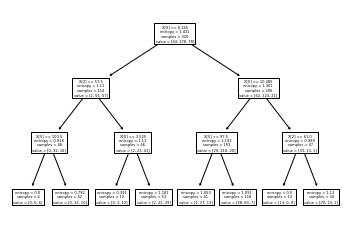

In [32]:
#PLot the decision tree

tree.plot_tree(model);


In [33]:
r = export_text(model, feature_names=['Sales','CompPrice','Income','Advertising','Population','Price'])
print(r)

|--- Sales <= 6.16
|   |--- Income <= 57.50
|   |   |--- Price <= 100.50
|   |   |   |--- class: 3
|   |   |--- Price >  100.50
|   |   |   |--- class: 2
|   |--- Income >  57.50
|   |   |--- Sales <= 3.52
|   |   |   |--- class: 3
|   |   |--- Sales >  3.52
|   |   |   |--- class: 3
|--- Sales >  6.16
|   |--- Sales <= 10.48
|   |   |--- Price <= 97.50
|   |   |   |--- class: 2
|   |   |--- Price >  97.50
|   |   |   |--- class: 2
|   |--- Sales >  10.48
|   |   |--- Income <= 61.00
|   |   |   |--- class: 1
|   |   |--- Income >  61.00
|   |   |   |--- class: 1



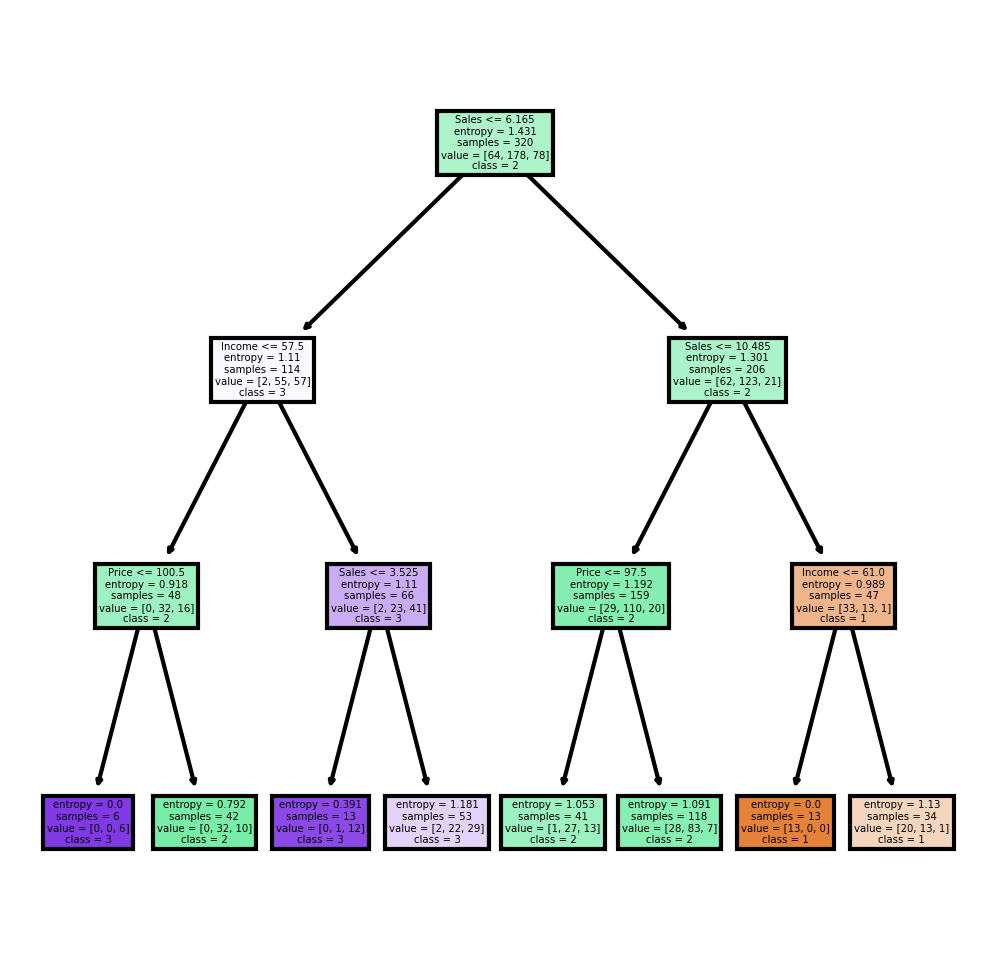

In [34]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [35]:
#Prediction on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    52
1    15
3    13
dtype: int64

In [36]:
preds


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1,
       3, 3, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1], dtype=int64)

In [37]:
np.mean(preds==y_test)


0.5875

In [38]:

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [39]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5875

decisiontree regressor example

In [41]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [43]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
#accuracy
model.score(X_test,y_test)

-1.0507563535654092